# Hydration Model

By Gail Romer and Maia Materman


## A Bit of Background Information:

In this project, we wanted to investigate the way in which water travels through the body. Thankfully, we were able to find a research paper which looked at this phenomenon. From this paper, we were able to draw a stock and flow diagram and ask a few questions as to the way in which water moves between tissue compartments. For reference, the paper is titled Pharmacokinetic Analysis of Absorption, Distribution and Disappearance of Ingested Water Labeled with D2O in Humans.

A thorough analysis of this paper led us to a few questions, one of which we looked at in depth.
## Our Question:

### How does a varied input rate into the tissue effect the amount of water in each compartment over time?
Answering this question involved sweeping the input rate and plotting the amount of water in each stock over time. Interestingly enough, the way in which the water traveled and stayed in the different tissue compartments did not stay linear as we plotted them at different input rates.

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_system(ka, k12, k21, kel):
    """Make a system object for the water model.
    
    ka (per minute)
    k12 (per minute)
    k21 (per minute)
    kel (per minute)
    
    returns: System object
    """
   
    
    init = State(V_1 = 18.5, V_2 = 31.6)   # V_1 = Compartment 1, V_2 = Compartment 2
                                        

    t0 = 0 # time has yet to begin
    dt = 1 # minutes
    t_end = 3 * 60 # 3 hours
    

    return System(init=init, t0=t0, t_end=t_end,
                  ka=ka, k12=k12, k21=k21, kel=kel, dt=dt)


make_system(
            0.0715,       #ka per minute
            0.0384,       #k12 per minute
            0.0223,       #k21 per minute
            0.241         #kel per minute
)

,values
init,V_1 18.5 V_2 31.6 dtype: float64
t0,0
t_end,180
ka,0.0715
k12,0.0384
k21,0.0223
kel,0.241
dt,1


In [3]:
def plot_results(V_1, V_2):
    """Plot the results of water model.
    
    V_1: TimeSeries
    V_2: TimeSeries
    
    """
    
    

In [4]:
def run_simulation(system, update_func, KA):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init

    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system, KA)

    return frame

In [5]:
# # Original

def update_func(state, dt, system,KA):
    """Update the water model.
    
    state: State (V_1, V_2)
    t: time
    system: System object
    
    returns: State (V_1, V_2)
    """
    
    unpack(system)
    v_1, v_2 = state
    
    
    
    kel_1 = (v_1/(v_1+v_2)) * kel
    kel_2 = (v_2/(v_1+v_2)) * kel
    
    dv1dt = KA + k21 - k12 - kel_1
    dv2dt = k12 - k21 - kel_2
    
    v_1 += dv1dt * dt
    v_2 += dv2dt * dt
    
    return State(V_1 = v_1, V_2 = v_2)

The code below is where we actually sweep the values of ka, this is essentially the input rate of the water into the tissue compartment. As ka varies, the rate at which the water flows into the system varies by the same amount which allows us to draw conclusions about their relationship. 

In [6]:
system = make_system(0.0715,       #ka per minute
            0.0384,        #k12 per minute
            0.0223,     #k21 per minute
            0.241         #kel per minute
           )
            
ka_1=0.02
ka_2=0.12

sweep_ka = SweepSeries() # Array to hold swept ka model data
ka_array = linspace(ka_1, ka_2, 10)

# KA=0.0715

# results = run_simulation(system, update_func, KA)
i=0
for KA in ka_array:
    i += 1
    
    results = run_simulation(system, update_func, KA)
    sweep_ka[i] = results

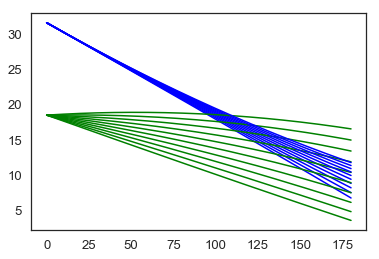

In [9]:
def plot_sweepseries(sweepseries):
    c = 1
    
    while c < 11 :
        v1 = sweepseries[c].V_1
        v2 = sweepseries[c].V_2
        
        v1.plot(color="green")
        v2.plot(color="blue")
        
        
        c += 1
        
    return
plot_sweepseries(sweep_ka)




In this plot, the x axis represents time and is in units of minutes. The y axis reprsents the amount of water and is in units of liters. When creating this graph with the given ka values, one major assumtion which we made was that a given kel (the output from each of the chambers) would stay proportional to the amount of water in that chamber. It is unclear as to whether or not this is a valid assumption, this field is still very much being researched currently. We assume that it is a sound assumption becuase it makes sense qualitatively with the way in which humans interact with water. The more water which we have, the less dehydrated we can stay for a longer period of time. Essentially both of these series looked at the inputs and outputs on each compartment and plotted the amount of water in each at any given time. This is what makes the latter V2 (green) series so interesting. While the blue series (V1) stays relatively linear, the more water that the green series gets, the more that does not empty water as quickly or effectively. 

In [ ]:
results.plot()

## Answer!!
Upon analyzing these graphs, we have come to realize that varying the input rates of the water into the tissue has an intriguing effect on that tissue over time. For the smaller compartment, the rate at which the water entered the tissue stayed fairly constant in its relationship to the amount of water in the compartment at any given time (as seen by the linear ways in which the graph of V1 behaves). The larger compartment, however, actually was unable to empty itself of water at even close to the same rate which it took water in, which meant that the water in the V2 compartment took more and more water over time. This phenomenon is what leads the green graph to start more linearly at the lower ka rates and actually flatten out as ka increases. An interesting experiment to take on (and one we may have embarked on with more time) is to have swept ka of V1 over a larger value range and deduced the ka value for when the blue graph flattened out which would depict where the V1 compartment could not empty water at a similar rate to how it took water in. 

### Where we could have improved
There were definitely a few places in this model that we could have improved. The biggest area which we could look into more deeply (and potentially sweep across) would be the way in which kel impacts the graphs. An interesting thing about the paper is that it did not explicitly state the way in which kel behaved for the individual compartments. Instead, it gave kel as a quantity that was the sum of kel1 and kel2. From this, we assumed these kel values to be proportional to the amount in each compartment. If we wanted to take this further, we could have swept the kel values for each compartment and attempted to match real world data which we found in a report we looked at initially and didn't end up using. That would have been a very very interesting project, to say the least! 

In addition, we used an iterative modeling process throughout the whole project. We started by looking at the HIV pharmacokinetics model and creating a basic model from that. We ended up iterating on that model to sweep a variety of factors (like the initial values of the compartments) before deciding that ka would tell us the most interesting things about this process in the read world. We ended up iterating with the range of ka values, settling on this number because it told a good amount about what we needed without making our graph too complicated and difficult to understand. 

## Abstract

The question we tried to answer in this project was: How does a varied input rate into the tissue effect the amount of water in each compartment over time? By iterating through a variety of models and parameters, we were able to find that after a certain amount of water input, the compartments cannot keep up with the output rate and the compartments actually end up taking on water. This was especially evident when we considered V2. 

The plot below depicts our conclusions very well. On the x axis, time is plotted in minutes, and on the y axis, the amount of water in a given compartment is plotted in liters.

In [ ]:
plot_sweepseries(sweep_ka)

As the graphs flatten out (particularily looking at V2), we can see that the output of the graph sometimes does not have as high of a rate as the input. Our model effectively depicts the way in which the water is transfered in the compartments, but we assumed the output of each compartment was proportional to the amount of water in that given compartment, which could lead our model to be inaccurate.   